# 小テスト(全3問)  
## 第1問  重回帰
教材ではボストンデータセットについて、２つの特徴量LSTATとRMを用いて住宅価格の中央値MEDVを予測しましたが、精度があまり良くありませんでした。そこで、特徴量についてもう一つ追加して改めて中央値を予測してみることにします。  
それぞれの特徴量を標準化し重回帰分析にかけることで標準化偏回帰係数を求め、その大きさの評価から**DIS**が抑制関数としてMEDVに対する影響力が大きいことが判明しました。そこで、DISを特徴量に追加して再び重回帰分析してみましょう。


In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# BostonDatasetの読み込み
from sklearn.datasets import load_boston 
boston = load_boston()        

df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df=pd.concat([df_data,df_target], axis=1)

### 1)   
Xにdfから"LSTAT","RM","DIS"の値,yにdfから"MEDV"の値を取り出してarray型で代入してください。  
その後、ホールド・アウト法によってデータを分割してください。

In [2]:
#埋めてください
X=np.array(df.loc[:,['LSTAT','RM','DIS']])
y=np.array(df.loc[:,['MEDV']])

＜コメント＞

問題ないです。.valuesとかでもおkです。

### 2)  
線形回帰のインスタンスを生成し、モデルの学習をさせ、trainデータとtestデータの決定係数を出力してください。

In [4]:
from sklearn.linear_model import LinearRegression

#ここを埋めてください
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)

print('train: %.3f'%lr.score(X_train,y_train))
print('test: %.3f'%lr.score(X_test,y_test))

train: 0.659
test: 0.616


特徴量に２つLSTATとRMだけを用いた場合、  
train: 0.651  
test : 0.607  
という結果となりましたので、比較してください。

### 3)
 RMSE（Root Mean Square Error: 平均二乗誤差の平方根）を出してみましょう。

In [6]:
from sklearn.metrics import mean_squared_error as mse

#ここを埋めてください
print('train: %.3f'%(mse(y_train,lr.predict(X_train))**(1/2)))
print('test: %.3f'%(mse(y_test,lr.predict(X_test))**(1/2)))

train: 5.378
test: 5.654


### 4)
RMSEとして出したこの値が意味することは何か説明してください。

予測が正解からどれだけずれるか。ルートをとることで次元を元のデータと同じスケールに戻しているため直感的にわかりやすい。



### 5)
特徴量を一つ追加してもなぜ精度があまり高くならないか要因として考えられるものをいくつか挙げ説明してください。  
またその原因を除くために何をすればよいか挙げてください。

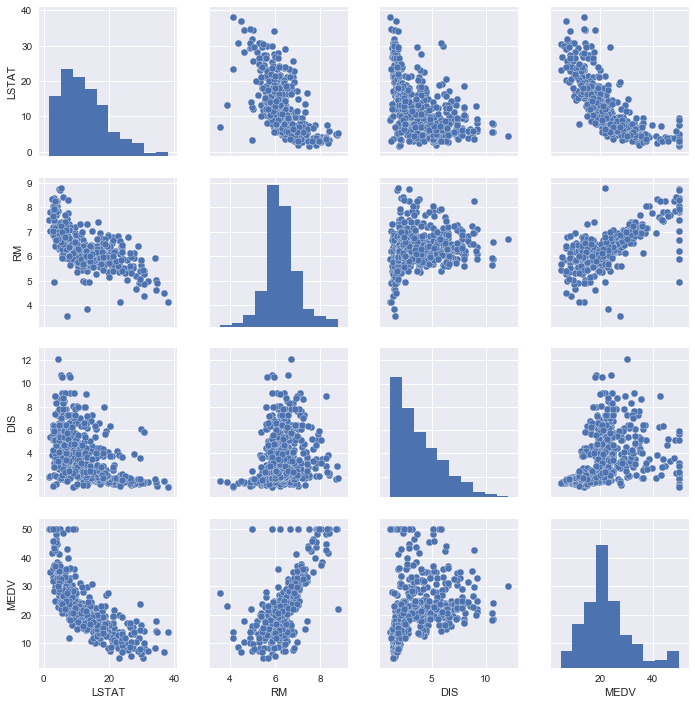

In [8]:
import seaborn as sns
data_df=df.loc[:,['LSTAT','RM','DIS','MEDV']]
sns.pairplot(data_df)
plt.show()

RMとLSTATがMEDVに対して何かしらの傾向を持っているのに対してDISは全体的に散らばりがあり相関が小さいことが見て取れる。
->よりMEDVと相関の強そうな変数を採用するべき。
DIS=5 つのボストン市の雇用施設からの､重み付けされた距離ということは本来小さいほどMEDVが上がりそうだがそうなっていない。
->それを引き起こしている要因について解釈を入れる。ノイズならば取り除く必要がある。



＜コメント＞

素晴らし！満点超えます

教材的な模範解答を出せば、「変数間の共変関係」、「目的変数との間に非線形的な関係」などに触れるとことになります。

## 第2問 多項式回帰   
多項式回帰は名前の通り一つの特徴量に関して、複数の次数の基底を用意することに特徴があります。  
一般に回帰に関してどのモデルを選ぶか考える時、目的変数と特徴量の関係を図示化をします。では多項式回帰を選ぶ場合、特徴量と目的変数の関係はどのようになっている場合でしょうか。  
また、次数を大きくした場合どのようなデメリットがあるのか説明してください。

曲線になっている

次数を大きくすると表現力が増す一方で過学習の危険が高まる。

## 第3問 正則化   
HAIT教材では正則化の手法について  
**Ridge回帰**  
**LASSO**  
**ElasticNet**    
の3手法について扱いました。  
<img src="https://s3-ap-northeast-1.amazonaws.com/ai-std/001.png">

以上の３つの図が3手法のいずれに該当するか答え、それぞれどのような特徴と使い方をするのか答えてください。

In [ ]:
①LASSO
    L1ノルムによるペナルティを課す。
    最適解が軸上になりやすく、係数がほぼ０になるため自動で変数選択を行うことができる。
    余計な特徴量を削除してくれるため、サンプル数に対して特徴量が多いスパースなデータの分析に向いている。

In [ ]:
②Ridge回帰
    L2ノルムによるペナルティを課す。
    データに対して過学習を起こしている場合には最適解が原点から離れた位置にあることが多く、それを抑えるために利用される。

In [ ]:
③ElasticNet
    L1ノルムとL2ノルムの両方を用いてペナルティを課す。
    変数削減の強さを微調整するために使われる。 L1ノルムとL２ノルムの比を決めることでその強さを調整できる。

＜コメント＞

二連続満点！！！完璧すぎ！